<a href="https://colab.research.google.com/github/x3gan/elte-msc/blob/main/Deep%20Network%20Development/Numpy_Fundamentals_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NumPy Fundamentals**

<div style="border: 3px solid #222; padding: 16px; border-radius: 10px; background-color: #1c1f26; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #e0e0e0;">
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 12px;">
    <span style="font-size: 24px; color: #ff5555;">&#128274;</span>
    <span style="font-size: 16px;"><strong>Project:</strong> Introduction</span>
  </div>
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 8px;">
    <span style="font-size: 20px; color: #ff5555;">&#128218;</span>
    <span style="font-size: 16px;"><strong>Course:</strong> Deep Network Development</span>
  </div>
  <div style="margin-top: 12px; font-size: 14px;">
    <span style="font-size: 18px; color: #6e8192;">&#128100;</span>
    <span style="font-weight: bold;"><strong>Authors:</strong></span> Tamás Takács, Imre Molnár (PhD students, Department of Artificial Intelligence, Eötvös Loránd University)
  </div>
</div>
<hr style="border: none; border-top: 2px solid #444;">
<br>

<img src="https://i.ibb.co/5gGPWvmw/1706863582925-1.png" alt="1706863582925-1" border="0">

## **Operations performed along certain axes**

These operations create new values from slices taken from one or more axis of an array. They all have an `axis` parameter, with which we can give along what axis the operation should be performed.

For example, calling the `np.sum()` operation on a (2,3) sized array with the `axis=0` parameter will sum the elements along the axis with index #0, while calling it with the `axis=1` parameter will do the same along axis #1. In the former case, the resulting array will become (3,) shaped, while in the latter case it will become (2,) shaped. Multiple axes can be given with the `axis` parameter (by listing them in a tuple), in which case those axes will not appear in the result, as summation happens along all the given axes. If we call the `np.sum()` function on the array without the `axis` parameter, it will sum the entire array, resulting in a scalar (this means the function was called with the default `axis=None` argument)

In [ ]:
# @title Roadmap Generator
%%capture flowchart_output
from graphviz import Digraph

def create_numpy_fundamentals_flowchart(output_filename='numpy_fundamentals_flowchart'):
    dot = Digraph(name='NumpyFundamentals', format='png')
    dot.attr(rankdir='LR')  # Left-to-right layout
    dot.attr('node', shape='box', style='filled', fontsize='12', fontname='Arial')

    # Create nodes with a newline before the difficulty annotation:
    dot.node('BasicOps', 'Basic Operations\n(Easy)', fillcolor='#A0E7A0')
    dot.node('LogicalOps', 'Logical Operations\n(Easy)', fillcolor='#A0E7A0')
    dot.node('AdvIndex', 'Advanced Indexing\n(Moderate)', fillcolor='#F6D49A')
    dot.node('ArrayManip', 'Array Manipulation\n(Moderate)', fillcolor='#F6D49A')
    dot.node('LinAlg', 'Linear Algebra\n(Difficult)', fillcolor='#F6A0A0')

    # Define the pipeline flow:
    dot.edge('BasicOps', 'LogicalOps')
    dot.edge('LogicalOps', 'AdvIndex')
    dot.edge('AdvIndex', 'ArrayManip')
    dot.edge('ArrayManip', 'LinAlg')

    dot.render(output_filename, view=False)

create_numpy_fundamentals_flowchart('numpy_fundamentals_flowchart')


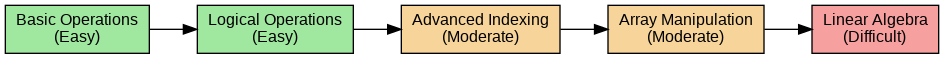

In [ ]:
from IPython.display import Image as IMG
IMG('numpy_fundamentals_flowchart.png')

In [ ]:
import numpy as np

a = np.arange(6, dtype=np.int32).reshape((2,3))
print("The 2D 'a' array:\n", a)
print("   ... its shape is", a.shape)

print("\nSumming array along axis#0: ", np.sum(a, axis=0))
print("Summing array along axis#1: ", np.sum(a, axis=1))
print("Summing array along axis#0 and axis#1: ", np.sum(a, axis=(0,1)))
print("Summing whole array: ", np.sum(a))

The 2D 'a' array:
 [[0 1 2]
 [3 4 5]]
   ... its shape is (2, 3)

Summing array along axis#0:  [3 5 7]
Summing array along axis#1:  [ 3 12]
Summing array along axis#0 and axis#1:  15
Summing whole array:  15


**Other similiar operations: `np.prod()`, `np.mean()`, `np.std()`, `np.amax()`, `np.amin()`**

In [ ]:
a = np.arange(6, dtype=np.int32).reshape((2,3))
print("The 2D 'a' array:\n", a)
print("   ... its shape is", a.shape)

print("\nProducts of array along axis#1: ", np.prod(a, axis=1))
print("Mean of array along axis#0: ", np.mean(a, axis=0))
print("Standard deviation of whole array: ", np.std(a))

# np.maximum() is elmentwise maximum of multiple arrays
# np.amax() is maximum along axis/axes of a single array

print("\nMaximum and minimum of array along axis#0: ", np.amax(a, axis=0), "and", np.amin(a, axis=0))


The 2D 'a' array:
 [[0 1 2]
 [3 4 5]]
   ... its shape is (2, 3)

Products of array along axis#1:  [ 0 60]
Mean of array along axis#0:  [1.5 2.5 3.5]
Standard deviation of whole array:  1.707825127659933

Maximum and minimum of array along axis#0:  [3 4 5] and [0 1 2]


**Logical operations include: `np.all()`, `np.any()`**

In [ ]:
a = np.arange(6, dtype=np.int32).reshape((2,3))
b = (a % 2 == 1) | (a < 4)
print("The 2D 'b' boolean array:\n", b)
print("   ... its shape is", b.shape)

print("\nLogical OR along axis#0: ", np.any(a, axis=0))
print("Logical OR on whole array: ", np.any(a))
print("Logical AND along axis#1: ", np.all(a, axis=1))
print("Logical AND on whole array: ", np.all(a))



The 2D 'b' boolean array:
 [[ True  True  True]
 [ True False  True]]
   ... its shape is (2, 3)

Logical OR along axis#0:  [ True  True  True]
Logical OR on whole array:  True
Logical AND along axis#1:  [False  True]
Logical AND on whole array:  False


## **Advanced indexing**

In **Advanced indexing**, similarly to **basic indexing**, we reference multiple elements/slices of an array. However, while in **basic indexing** we can only reference elements in the index-intervals (range) by using one certain step size, in **advanced indexing** there are two other methods available to us.

On one hand, we can use sequences (lists, iterators, integer arrays) for indexing.

Arrays created using **advanced indexing** will always be **copies** of the original array, not views.

In [ ]:
a = np.arange(6, dtype=np.int32)+10
print("The 'a' array:", a)
print("   ... its shape is", a.shape)

b = a[[1,3,3,-5]]   # indexing with a list of indices, negative indices are counted from backwards
print("\nThe 'b' array: ", b)

# writing the 'b' array does not modify the original 'a' array
b[0] = 42
print("\nThe modified 'b' array: ", b)
print("The original 'a' array after modifying 'b': ", a)



The 'a' array: [10 11 12 13 14 15]
   ... its shape is (6,)

The 'b' array:  [11 13 13 11]

The modified 'b' array:  [42 13 13 11]
The original 'a' array after modifying 'b':  [10 11 12 13 14 15]


Overwriting elements with advanced indexing:

In [ ]:
a = np.arange(6, dtype=np.int32)+10
print("The 'a' array:", a)
print("   ... its shape is", a.shape)

a[[1,5,2]] = 99
print("\nThe modified 'a' array:", a)

The 'a' array: [10 11 12 13 14 15]
   ... its shape is (6,)

The modified 'a' array: [10 99 99 13 14 99]


We can use an integer type array for indexing.

In [ ]:
a = np.arange(6, dtype=np.int32)+10
print("The 'a' array:", a)
print("   ... its shape is", a.shape)

idxs = np.array([0,2,0,-1,-4], dtype=np.int32)
print("\nThe 'a' array indexed with 'idxs' array:", a[idxs])


The 'a' array: [10 11 12 13 14 15]
   ... its shape is (6,)

The 'a' array indexed with 'idxs' array: [10 12 10 15 12]


If we index a 1-dimensional array with a multidimensional index array, the result will also be multidimensional.

In [ ]:
idxs = np.array([[2,3],[5,2],[1,1]], dtype=np.int32)
print("The 'idxs' array:", idxs)
print("   ... its shape is", idxs.shape)

b = a[idxs]
print("\nThe 'a' array indexed with the 2D 'idxs' array:", b)
print("   ... its shape is", b.shape)

The 'idxs' array: [[2 3]
 [5 2]
 [1 1]]
   ... its shape is (3, 2)

The 'a' array indexed with the 2D 'idxs' array: [[12 13]
 [15 12]
 [11 11]]
   ... its shape is (3, 2)


If we index a multidimensional array, along each axis we can use different indexing techniques. If we create a new array using indexing and at least along one axis we use advanced indexing, then the new array will be a copy of our specific part of the original array, not a view of it.

If we'd like to use a sequence to index along multiple axes, then the length of our two sequences must be equal. (If we use a multidimensional array for indexing along multiple axes, then the two index arrays must be broadcastable to the same shape).

Full documentation at: https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

If we'd like to select a list of elements from a 2 dimensional array, then along two axes we need one equal length sequence each to separately index the #0 and a #1 axis. For example if we'd like to return the `a[0,1], a[2,2], a[0,5]` elements, then we need to index as follows: `a[[0,2,0], [1,2,5]]`.

In [ ]:
a = np.arange(6, dtype=np.int32).reshape((2,3))+10
print("The 'a' array:\n", a)
print("   ... its shape is", a.shape)

idxs0 = [0,1,0]
idxs1 = [1,2,2]

b = a[idxs0, idxs1]  # extracting a[0,1], a[1,2], a[0,2] into the 'b' array


print("\nThe 'b' array:", b)
print("   ... its shape is", b.shape)

# we can also use a tuple of lists/arrays/... to do multi-dimensional indexing
# in fact, this is the same thing as above, due to automatic tuple-packing
idxs = (idxs0, idxs1)
b = a[idxs]
print("\nThe 'b' array:", b)
print("   ... its shape is", b.shape)

# advanced indexing only along a single axis: extracting slices from 'a'
c = a[[0,1,0],:]
print("\nThe 'c' array:\n", c)
print("   ... its shape is", c.shape)

# advanced indexing along one axis, basic indexing along the other
d = a[[0,1,0],::2]
print("\nThe 'd' array:\n", d)
print("   ... its shape is", d.shape)

# e = a[[0,1,0],[0,2]]  # but we can't do this:
#   IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3,) (2,)

# but we can do this: reshape #1 axis index array to (2,1) to be broadcastable to shape (2,3)
#     and match #0 axis index array shape (3,)
# indexed elements this way: [[a[0,0], a[1,0], a[0,0]], [a[0,2], a[1,2], a[0,2]]]
f = a[np.array([0,1,0]), np.array([0,2])[:,None]]
print("\nThe 'f' array:\n", f)
print("   ... its shape is", f.shape)

# NOTE
# There is an inconsistency how two basic indoces work vs how two array indexing works.
# If you have two slice indexing, the direct product of their indices are selected
# In contrast, two arrays form a list of pairs, describing the list of integer indices
a = np.arange(9, dtype=np.int32).reshape((3,3))
print("\nThe 'a' array:\n", a)

d1 = a[0::2, 0::2]
print("The 'd1' array:\n", d1)
d2 = a[[0,2], [0,2]]
print("The 'd1' array:\n", d2)

The 'a' array:
 [[10 11 12]
 [13 14 15]]
   ... its shape is (2, 3)

The 'b' array: [11 15 12]
   ... its shape is (3,)

The 'b' array: [11 15 12]
   ... its shape is (3,)

The 'c' array:
 [[10 11 12]
 [13 14 15]
 [10 11 12]]
   ... its shape is (3, 3)

The 'd' array:
 [[10 12]
 [13 15]
 [10 12]]
   ... its shape is (3, 2)

The 'f' array:
 [[10 13 10]
 [12 15 12]]
   ... its shape is (2, 3)

The 'a' array:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
The 'd1' array:
 [[0 2]
 [6 8]]
The 'd1' array:
 [0 8]


Instead of using multidimensional indexing on a multidimensional array, the array we want to index can be flattened to a single dimension (`ndarray.reshape(-1)`), then the multidimensional indices can be converted into 1-dimensional indices (`np.ravel_multi_index()`), this way the indexing can now be done on the flattened array. This technique can be useful if we want to perform an operation on our multidimensional array that is implemented only for one-dimensional arrays. The array's original shape can be regained after this with `ndarray.reshape(<original_shape>)`. The indexes referencing elements of the flattened array can be converted back to multidimensional indexes (`np.unravel_index()`).

Another method of using **advanced indexing** is **indexing with a boolean mask**. Maskin can also happen along one or more axes. The point is that it must be possible to broadcast the mask's size to become compatible with the array's shape along the desired axes.

In [ ]:
a = np.arange(6, dtype=np.int32).reshape((2,3))
print("The 'a' array:\n", a)
print("   ... its shape is", a.shape)

mask = a < 4
print("\nThe 'mask' array:\n", mask)
print("   ... its shape is", mask.shape)
print("   ... its data type is", mask.dtype)

b = a[mask]  # this is a copy, not a view!
print("\nThe 'b' array:\n", b)
print("   ... its shape is", b.shape)



The 'a' array:
 [[0 1 2]
 [3 4 5]]
   ... its shape is (2, 3)

The 'mask' array:
 [[ True  True  True]
 [ True False False]]
   ... its shape is (2, 3)
   ... its data type is bool

The 'b' array:
 [0 1 2 3]
   ... its shape is (4,)


**Printing elements selected using a mask:**

In [ ]:
a = np.arange(6, dtype=np.int32).reshape((2,3))
print("The 'a' array:\n", a)
print("   ... its shape is", a.shape)

# Select all even elements larger than 3
a[(a % 2 == 0) | (a > 3)] = 99

print("\nThe modified 'a' array:\n", a)

The 'a' array:
 [[0 1 2]
 [3 4 5]]
   ... its shape is (2, 3)

The modified 'a' array:
 [[99  1 99]
 [ 3 99 99]]


It's possible to use a mask only along the certain axes that we want to.

Let's zero out all the rows of array `a` that have at least one negative number!

In [ ]:
a = np.array([[1.2,2.5],[1.,-.6],[2.8,1.7],[-1.5,.7]], dtype=np.float32)
print("The 'a' array:\n", a)
print("   ... its shape is", a.shape)

a[np.any(a < 0., axis=1),1] = 0

print("\nThe modified 'a' array:\n", a)
print("   ... its shape is", a.shape)


The 'a' array:
 [[ 1.2  2.5]
 [ 1.  -0.6]
 [ 2.8  1.7]
 [-1.5  0.7]]
   ... its shape is (4, 2)

The modified 'a' array:
 [[ 1.2  2.5]
 [ 1.   0. ]
 [ 2.8  1.7]
 [-1.5  0. ]]
   ... its shape is (4, 2)


In [ ]:
a

array([[ 1.2,  2.5],
       [ 1. ,  0. ],
       [ 2.8,  1.7],
       [-1.5,  0. ]], dtype=float32)

In [ ]:
a<0

array([[False, False],
       [False, False],
       [False, False],
       [ True, False]])

In [ ]:
np.any(a<0, axis=1)

array([False, False, False,  True])

It's possible to use sequences and masks for indexing at the same time on different axes of an array.

A sequence can be created from a mask using the `np.where()` function.

## **Concatenating arrays, inserting, deleting.**

It's important to know that if a Numpy array is allocated in memory, its size cannot be changed. If we'd like to append or delete an element/row/column/etc., perhaps concatenate multiple arrays, Numpy must always create a new array, which can be a costly operation.

**Concatenating:**

`np.concatenate()`: Multiple arrays are concatenated along an already **existing** layer. It's important that all the axes, except the one used for concatenation, must be of equal length.

`np.stack()`: Concatenates multiple arrays along a **new** axis. All arrays must have the same shape.

In [ ]:
# CONCATENATE

a = np.arange(6, dtype=np.float32).reshape((2,3))
print("The 2D 'a' array:\n", a)
print("   ... its shape is", a.shape)

b = np.zeros((2,4), dtype=np.float32)
print("\nThe 2D 'b' array:\n", b)
print("   ... its shape is", b.shape)

c = np.concatenate([a, b], axis=-1)
print("\nThe two arrays concatenated along their last axis:\n", c)
print("   ... the concatenated array shape is", c.shape)

# STACK: all arrays must have the same shape

d = b[:,:3]
print("\nThe 2D 'd' array:\n", d)
print("   ... its shape is", d.shape)

e = np.stack([a, d], axis=0)
print("\nArrays 'a' and 'd' stacked along a new #0 axis:\n", e)
print("   ... the new shape is", e.shape)

f = np.stack([a, d], axis=-1)
print("\nArrays 'a' and 'd' stacked along a new last (#2) axis:\n", f)
print("   ... the new shape is", f.shape)


The 2D 'a' array:
 [[0. 1. 2.]
 [3. 4. 5.]]
   ... its shape is (2, 3)

The 2D 'b' array:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
   ... its shape is (2, 4)

The two arrays concatenated along their last axis:
 [[0. 1. 2. 0. 0. 0. 0.]
 [3. 4. 5. 0. 0. 0. 0.]]
   ... the concatenated array shape is (2, 7)

The 2D 'd' array:
 [[0. 0. 0.]
 [0. 0. 0.]]
   ... its shape is (2, 3)

Arrays 'a' and 'd' stacked along a new #0 axis:
 [[[0. 1. 2.]
  [3. 4. 5.]]

 [[0. 0. 0.]
  [0. 0. 0.]]]
   ... the new shape is (2, 2, 3)

Arrays 'a' and 'd' stacked along a new last (#2) axis:
 [[[0. 0.]
  [1. 0.]
  [2. 0.]]

 [[3. 0.]
  [4. 0.]
  [5. 0.]]]
   ... the new shape is (2, 3, 2)


**Inserting and deleting elements:**

If we'd like to use a loop to insert multiple elements/slices into an array, then it may be much more efficient if we used a list that contains the elements/slices we want to insert, then finally create an array with the list, using, for example, concatenation.

For inserting a single element/slice we can use the `np.append()` and `np.insert()` operations.

With the `np.pad()` operation, we can pad new elements to the edges of an array, even to multiple axes.

Deleting elements is usually done with correct indexing instead of `np.delete()`.

## **Matrix and vector operations, linear algebra**

Matrix multiplication:

In [ ]:
m = np.arange(9, dtype=np.float32).reshape((3,3))   # 3 by 3 matrix
print("The 'm' matrix:\n", m)
print("   ... its shape is", m.shape)

mm = np.matmul(m, m)

print("\nThe matrix product is:\n", mm)
print("   ... its shape is", mm.shape)

mm = np.dot(m, m)    # dot product: when applying on 2D matrices, has the same effect as np.matmul()

print("\nThe matrix product is:\n", mm)
print("   ... its shape is", mm.shape)

The 'm' matrix:
 [[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
   ... its shape is (3, 3)

The matrix product is:
 [[ 15.  18.  21.]
 [ 42.  54.  66.]
 [ 69.  90. 111.]]
   ... its shape is (3, 3)

The matrix product is:
 [[ 15.  18.  21.]
 [ 42.  54.  66.]
 [ 69.  90. 111.]]
   ... its shape is (3, 3)


Non-square matrix, $M^T M$

In [ ]:
m = np.arange(6, dtype=np.float32).reshape((2,3))   # 2 by 3 matrix
print("The 'm' matrix:\n", m)
print("   ... its shape is", m.shape)

mm = np.matmul(m, m.T)   # transpose: m.T or np.transpose(m)

print("\nThe matrix product is:\n", mm)
print("   ... its shape is", mm.shape)

The 'm' matrix:
 [[0. 1. 2.]
 [3. 4. 5.]]
   ... its shape is (2, 3)

The matrix product is:
 [[ 5. 14.]
 [14. 50.]]
   ... its shape is (2, 2)


**Multiplying a vector with a matrix:**

In [ ]:
m = np.arange(6, dtype=np.float32).reshape((2,3))   # 2 by 3 matrix
print("The 'm' matrix:\n", m)
print("   ... its shape is", m.shape)
v1 = np.arange(3, dtype=np.float32)
print("The 'v1' vector:\n", v1)
print("   ... its shape is", v1.shape)

# (2, 3) x (3,) -> (2,)

r1 = np.dot(m, v1)
print("\nThe result vector:\n", r1)
print("   ... its shape is", r1.shape)

# (2,) x (2, 3) -> (3,)

v2 = v1[:2]
print("The 'v2' vector:\n", v2)
print("   ... its shape is", v2.shape)

r2 = np.dot(v2, m)
print("\nThe result vector:\n", r2)
print("   ... its shape is", r2.shape)

The 'm' matrix:
 [[0. 1. 2.]
 [3. 4. 5.]]
   ... its shape is (2, 3)
The 'v1' vector:
 [0. 1. 2.]
   ... its shape is (3,)

The result vector:
 [ 5. 14.]
   ... its shape is (2,)
The 'v2' vector:
 [0. 1.]
   ... its shape is (2,)

The result vector:
 [3. 4. 5.]
   ... its shape is (3,)


**Inner product of two vectors:**

In [ ]:
v1 = np.arange(3)
v2 = np.arange(3)
print("\nThe 'v1' vector:", v1)
print("   ... its shape is", v1.shape)
print("The 'v2' vector:", v2)
print("   ... its shape is", v2.shape)

print("\nTheir dot product is: ", np.dot(v1, v2))


The 'v1' vector: [0 1 2]
   ... its shape is (3,)
The 'v2' vector: [0 1 2]
   ... its shape is (3,)

Their dot product is:  5


**Other important operations:**

In [ ]:
m = np.array([[2., 1., 3.],[4., 2., 6.],[1., 1., 5.]], dtype=np.float32)
print("The 'm' matrix:\n", m)
print("   ... its shape is", m.shape)

print("\nRank of matrix:", np.linalg.matrix_rank(m)) # not full rank since row#1 == 2*row#0

print("Determinant of matrix:", np.linalg.det(m))  # zero since it is not full rank

v1 = np.arange(3, dtype=np.float32)
print("\nThe 'v1' vector:\n", v1)
print("   ... its shape is", v1.shape)
print("\nLength of vector 'v1' (L2 norm):", np.linalg.norm(v1, ord=2))   # ord=2 is the default (euclidean distance)

print("\nLength of row-vectors of 'm' mnatrix:", np.linalg.norm(m, axis=1, ord=2))

# euclidean distance of two points
two_points = np.array([[1.,2.,-2.],[5., 3., 2.]])
print("\nTwo points:\n", two_points)

vec_length = np.linalg.norm(two_points[0,:] - two_points[1,:], ord=2)
print("  ... their distance:", vec_length)

The 'm' matrix:
 [[2. 1. 3.]
 [4. 2. 6.]
 [1. 1. 5.]]
   ... its shape is (3, 3)

Rank of matrix: 2
Determinant of matrix: 0.0

The 'v1' vector:
 [0. 1. 2.]
   ... its shape is (3,)

Length of vector 'v1' (L2 norm): 2.236068

Length of row-vectors of 'm' mnatrix: [3.7416575 7.483315  5.196152 ]

Two points:
 [[ 1.  2. -2.]
 [ 5.  3.  2.]]
  ... their distance: 5.744562646538029


In [ ]:
a=np.array([[1,2,3], [2.4, 5, 3]])
a #( two vectors, 3 items long each)
# sum of squares along each rows
np.sqrt(np.sum(a**2,axis=1))

array([3.74165739, 6.30555311])

## **Other useful Numpy operations**

**Sorting, counting, searching:**

https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.sort.html

**Set operations:**

https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.set.html

`np.apply_along_axis()`: This operation performs a function that is defined for 1-dimensional arrays, on a multidimensional array's 1-dimensional slices, then concatenates the results. Although this function may be useful at times, we must know that this technique is about as useful as writing a simple Python loop to keep calling the function on the sliced array, then concatenating the results. So **if we want to perform the inner operation on many small slices, this method is not efficient.**

### **HOMEWORK (Optional)**

- **Exercise 1: Advanced Broadcasting and Vectorization**  
  Write a program that creates arrays of different shapes and demonstrates numpy's broadcasting rules by performing element-wise arithmetic operations without using loops. Explore how broadcasting can simplify calculations such as outer products and sums along specific axes.

- **Exercise 2: Tensor Contractions with np.einsum**  
  Given two or more multi-dimensional arrays, use `np.einsum` to perform tensor contractions that mimic operations like matrix multiplication or computing the trace of a matrix. Compare the clarity and performance of your einsum-based solution with traditional methods.

- **Exercise 3: Advanced Boolean Indexing and np.where**  
  Create a large 2D numpy array and use advanced boolean indexing to filter elements based on a condition (for example, selecting all elements above a threshold). Then, use `np.where` to replace values meeting a specific criterion with new values, and print the modified array.

- **Exercise 4: Structured Arrays and Sorting**  
  Create a structured numpy array with fields such as `name` (string), `age` (integer), and `salary` (float). Write code to sort the array by one or more fields and filter the records based on conditions (for example, selecting entries where age is above a certain value).

- **Exercise 5: Applying Custom Functions with np.vectorize**  
  Define a custom Python function that implements a piecewise or non-linear transformation on a number. Use `np.vectorize` to apply this function efficiently over a large numpy array, and compare the execution time with a standard Python loop.

- **Exercise 6: Advanced Array Manipulation with np.meshgrid and np.indices**  
  Generate coordinate grids using `np.meshgrid` and `np.indices`, then compute a custom function (such as a Gaussian or a sine wave pattern) over the 2D space defined by these grids. Visualize the resulting array using matplotlib to observe the pattern.


In [2]:
import numpy as np

**Exercise 1: Advanced Broadcasting and Vectorization**<br>
Write a program that creates arrays of different shapes and demonstrates numpy's broadcasting rules by performing element-wise arithmetic operations without using loops. Explore how broadcasting can simplify calculations such as outer products and sums along specific axes.

In [18]:
a = np.arange(6, dtype= np.int32).reshape(2, 3)
print(a)

[[0 1 2]
 [3 4 5]]


In [4]:
print(a + 1)

[[1 2 3]
 [4 5 6]]


In [13]:
b = np.array([1,2], dtype= np.int32)
print(b)
print(b.shape)

[1 2]
(2,)


In [15]:
bn = b.reshape((2,1))
print(a)
print(bn)
print(bn.shape)
print(a + bn)

[[0 1 2]
 [3 4 5]]
[[1]
 [2]]
(2, 1)
[[1 2 3]
 [5 6 7]]


**Exercise 2: Tensor Contractions with np.einsum**<br>
Given two or more multi-dimensional arrays, use np.einsum to perform tensor contractions that mimic operations like matrix multiplication or computing the trace of a matrix. Compare the clarity and performance of your einsum-based solution with traditional methods.

In [19]:
a = np.array([[1,2,3], [4,5,6]], dtype= np.int32)
print(a)

[[1 2 3]
 [4 5 6]]


In [20]:
b = np.array([[7,8,9], [10,11,12]], dtype= np.int32)
print(b)

[[ 7  8  9]
 [10 11 12]]


In [23]:
c = np.einsum('ij,ij->ij', a, b)
print(c)

[[ 7 16 27]
 [40 55 72]]


**Exercise 3: Advanced Boolean Indexing and np.where**<br>
Create a large 2D numpy array and use advanced boolean indexing to filter elements based on a condition (for example, selecting all elements above a threshold). Then, use np.where to replace values meeting a specific criterion with new values, and print the modified array.

In [24]:
a = np.arange(1, 10001).reshape(100, 100)
print(a)

[[    1     2     3 ...    98    99   100]
 [  101   102   103 ...   198   199   200]
 [  201   202   203 ...   298   299   300]
 ...
 [ 9701  9702  9703 ...  9798  9799  9800]
 [ 9801  9802  9803 ...  9898  9899  9900]
 [ 9901  9902  9903 ...  9998  9999 10000]]


In [25]:
print(a % 2 == 0)

[[False  True False ...  True False  True]
 [False  True False ...  True False  True]
 [False  True False ...  True False  True]
 ...
 [False  True False ...  True False  True]
 [False  True False ...  True False  True]
 [False  True False ...  True False  True]]


In [26]:
b = np.where(a % 2 == 0, 0, a) #if element of a is divisible by 2 then change it to 0, else return it
print(b)

[[   1    0    3 ...    0   99    0]
 [ 101    0  103 ...    0  199    0]
 [ 201    0  203 ...    0  299    0]
 ...
 [9701    0 9703 ...    0 9799    0]
 [9801    0 9803 ...    0 9899    0]
 [9901    0 9903 ...    0 9999    0]]


**Exercise 4: Structured Arrays and Sorting**<br>
Create a structured numpy array with fields such as name (string), age (integer), and salary (float). Write code to sort the array by one or more fields and filter the records based on conditions (for example, selecting entries where age is above a certain value).

In [6]:
e = np.array([('A', 30, 35.0), ('B', 31, 36.5), ('C', 32, 37.1)], dtype=[('name', 'U255'), ('age', np.int32), ('salary', np.float32)])
print(e)

[('A', 30, 35. ) ('B', 31, 36.5) ('C', 32, 37.1)]


In [7]:
print(np.sort(e, order='age'))

[('A', 30, 35. ) ('B', 31, 36.5) ('C', 32, 37.1)]


In [8]:
print(np.sort(e, order=['salary', 'age'], ))

[('A', 30, 35. ) ('B', 31, 36.5) ('C', 32, 37.1)]


In [13]:
mask = e['age'] >=31
print(e[mask])

[('B', 31, 36.5) ('C', 32, 37.1)]
